# ~ ~ ~ Spectral Diagnostics using FISS data ~ ~ ~ 

#### In this notebook

Describe what we do here!

In [1]:
# We will import some basic packages:

from astropy.io import fits
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# First we will open the most dramatic spectral line, H alpha
cube_halpha = fits.open("/home/milic/Dropbox/FISS_velocities/Halpha.FISS.20170614_170511.quiet.fits")[0].data
cube_halpha.shape

(150, 256, 512)

In [4]:
# We have 512 wavelenght points, at 150 x 256 pixels! (Each pixel is 0.16 arcsec, so something like ~ 100 km)

Text(0.5, 1.0, 'Continuum')

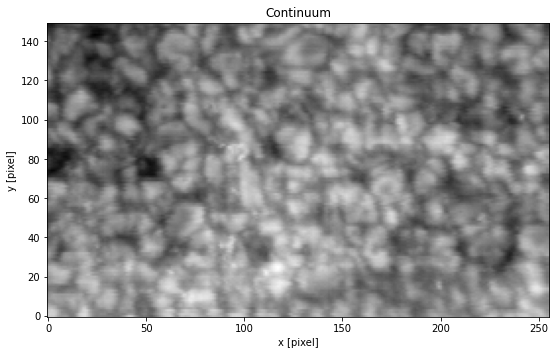

In [5]:
# Let's plot one wavelength to see if this makes sense. Image is basically spatial distribution of 
# the intensity at a fixed wavelength. Typically we choose 0-th wavelength as it most commonly corresponds
# to the continuum
plt.figure(figsize=[9,9])
plt.imshow(cube_halpha[:,:,0],cmap='gray',origin='lower')
plt.xlabel("x [pixel]")
plt.ylabel("y [pixel]")
plt.title("Continuum")

Now, we will calculate to spatially averaged spectrum to see what are we dealing with here. It is good to see how our spectral line looks like. To plot that in  meaningful way we will also need wavelengths. They are in the same file:

In [7]:
ll_halpha = fits.open("/home/milic/Dropbox/FISS_velocities/wavha.fiss.20170614.fits")[0].data
ll_halpha.shape

(512,)

512 wavelengthts for 512 wavelength points, looks good so far!

In [8]:
# Let's normalize the cube by dividing with the mean continuum intensity over the image
cube_halpha /= np.mean(cube_halpha[:,:,0]) 

In [10]:
# And calculate the mean spectrum:
mean_spectrum = np.mean(cube_halpha,axis=(0,1))

Text(0.5, 1.0, 'Spatially averaged spectrum')

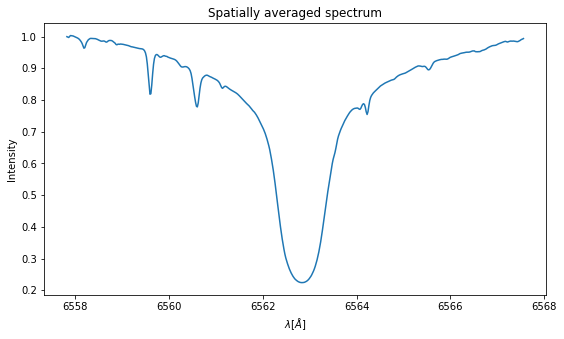

In [11]:
plt.figure(figsize=[9,5])
plt.plot(ll_halpha,mean_spectrum)
plt.xlabel("$\\lambda [\\AA]$")
plt.ylabel("Intensity")
plt.title("Spatially averaged spectrum")

Looks like H$\alpha$ indeed! Discuss a little bit the line shape here. Also the wing extension, there is basically no continuum here! 

#### Now, in the next chapter we will find the center of the line as the minimum of the mean spectrum. We will do that by fitting a parabola through 5 points around the perceived center of the line (the point if with minimum intensity). Note that this is more precise than just picking the wavelength with minimum intensity. 

### Now, let's scan through the line. To make it easier, first plot the spectrum with indices as x-axis to see easier which index belongs to continuum, wing, linecore, etc...

Text(0.5, 1.0, 'Spatially averaged spectrum')

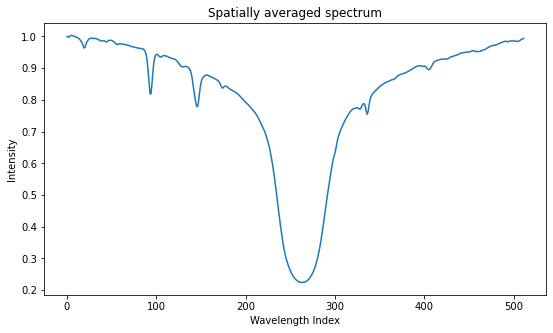

In [71]:
plt.figure(figsize=[9,5])
plt.plot(mean_spectrum)
plt.xlabel("Wavelength Index")
plt.ylabel("Intensity")
plt.title("Spatially averaged spectrum")

Text(0.5, 1.0, 'Wavelength of your choice')

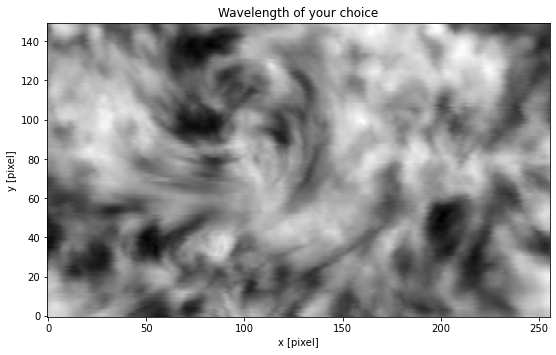

In [72]:
# Let's plot the image, wavelength by wavelength. Choose interesting indices from the plot above:
plt.figure(figsize=[9,9])
plt.imshow(cube_halpha[:,:,240],cmap='gray',origin='lower')
plt.xlabel("x [pixel]")
plt.ylabel("y [pixel]")
plt.title("Wavelength of your choice")

#### We will now find the wavelenegth of the line center in order to be able to use that as our referent wavelength. Data might be calibrated but it's still good to know if our line center is where we expect it to be. 

#### We will do this by fitting a parabola around the line center and then analytically finding the minimum of the said parabola. This is giving us some sub-pixel precision.

In [12]:
indmin = np.argmin(mean_spectrum) #Index of the point with minimum intensity:
print (indmin) # test if that makes sense

# We will subtract the percieved mean wavelength. This is to improve numerical stability of the fit
x = ll_halpha[indmin-10:indmin+11]-np.mean(ll_halpha[indmin-10:indmin+11]) 
y = mean_spectrum[indmin-10:indmin+11]

# Fit a parabola (polynomial of degree 2, through a couple of points each side of( center)
p = np.polyfit(x,y,2)
print (p)
# Location of the minimum is -b/2a where y = ax^2 + bx + c
ll0 = -p[1]/2/p[0] + np.mean(ll_halpha[indmin-10:indmin+11])
print (ll0)

263
[ 0.54428258 -0.00246011  0.22384023]
6562.83624432977


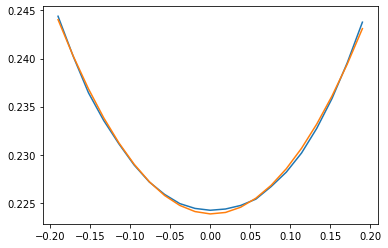

In [13]:
# If you want to be sure the fit is good, have a look here:

fit = x**2.0 * p[0] + x * p[1] + p[2]
plt.plot(x,y)
plt.plot(x,fit)

We all know by hard magical numbers of Halpha line center 6562.8, and this is very close to it. (Probably someone already calibrated the data). It did not have to be, and it is always good to re-center your observations to what you think is the rest wavelength. 

#### To summarize this part, let's plot a 4-panel with image of the solar surface at few different wavelengths:

Text(0.5, 1.0, 'Wavelength = -0.00225995477012475')

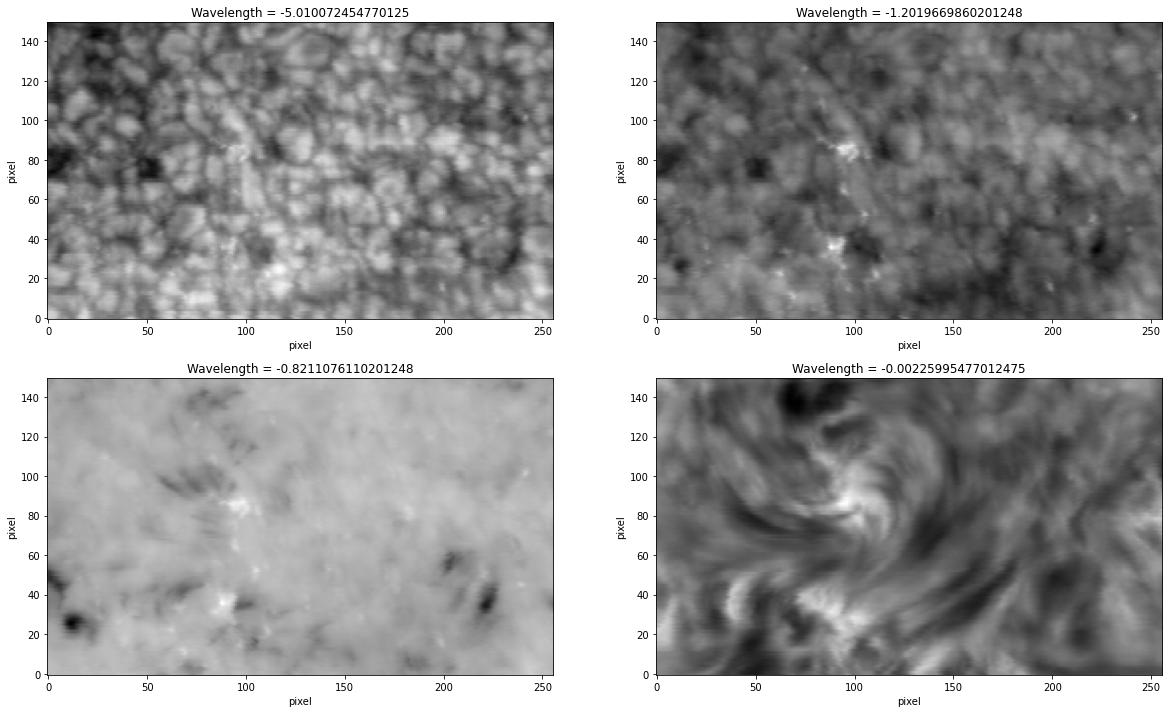

In [14]:
# Let's plot multiple wavelengths now:
indices = [0,200,220,263]

plt.figure(figsize=[20,12])
plt.subplot(221)
plt.imshow(cube_halpha[:,:,indices[0]],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_halpha[indices[0]]-ll0))
plt.subplot(222)
plt.imshow(cube_halpha[:,:,indices[1]],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_halpha[indices[1]]-ll0))
plt.subplot(223)
plt.imshow(cube_halpha[:,:,indices[2]],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_halpha[indices[2]]-ll0))
plt.subplot(224)
plt.imshow(cube_halpha[:,:,indices[3]],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_halpha[indices[3]]-ll0))

Now, another way of thinking about this multi-wavelength images is to say we got a spectrum for each pixel. If you don't trust us, let's have a look at that, we have 150 x 256 pixels, so let's pick some random indices and plot these spectra

In [17]:
sample_x = np.random.choice(149,10)
sample_y = np.random.choice(255,10)
print (sample_x, sample_y)

[ 54 140  95 127   6  12 114  39  15  42] [240 213  26 171  13  62  57   2 171  70]


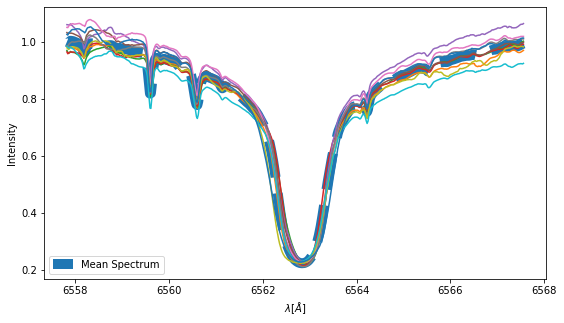

In [18]:
plt.figure(figsize=[9,5])
plt.plot(ll_halpha,mean_spectrum,'--',linewidth=10,label='Mean Spectrum')
plt.xlabel("$\\lambda [\\AA]$")
plt.ylabel("Intensity")
for i in range(0,10):
    plt.plot(ll_halpha,cube_halpha[sample_x[i],sample_y[i],:])
plt.legend()

### Why are the spectra different? And why are they not THAT different.
#### Think about the following: 
- Line center position
- Line asymmetry 
- "Continuum" level
- Line core level
- Line width

## Finding velocities as the line center position shift

If you look at the above, you will see that he positions of the line centers (minima) are slightly different for each pixel. If we say that is is some representative velocity "seen" by H$\alpha$ line, we can use this to infer velocity via Doppler effect. 

#### What are some conceptual problems with this? 

.

.

.
#### Even with all these, we will get some idea of the velocity. Let's use the concept from the above (fitting the parabola around the line core), to infer velocities for each pixel. 

In [19]:
def calc_line_center(spectrum, wavelength):
    indmin = np.argmin(spectrum) #Index of the point with minimum intensity:
    
    x = (wavelength - np.mean(wavelength))[indmin-10:indmin+11] 
    y = spectrum[indmin-10:indmin+11]
    # Fit a parabola (polynomial of degree 2, through a couple of points each side of center)
    p = np.polyfit(x,y,2)
    
    l_center = -p[1]/2/p[0] + np.mean(wavelength)
    return l_center

In [20]:
# Let's try on a random spectrum and see if it makes sense: 
l_center_random = calc_line_center(cube_halpha[7,6],ll_halpha)
print (l_center_random)

6562.933626350316


In [21]:
# Looks reasonable, what velocity would this be? 
c = 2.997E5 # in km/s
v_test = (l_center_random-ll0)/ll0 *c 
print (v_test)

4.447069905629287


Nice velocity! Proper way to do this would be to use it on the whole map, so that we can plot velocity maps. 

In [22]:
line_centers = np.zeros([150,256])
for i in range(0,150):
    for j in range(0,256):
        line_centers[i,j] = calc_line_center(cube_halpha[i,j],ll_halpha)

In [23]:
v_line_center = (line_centers - ll0)/ll0 * c

Text(0, 0.5, 'y [pix]')

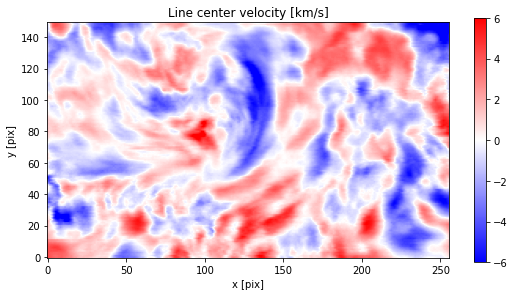

In [24]:
# And let's plot the velocity map! Exciting!
plt.figure(figsize=[9,9])
plt.imshow(v_line_center,vmin=-6,vmax=6,cmap='bwr',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Line center velocity [km/s]")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")

### Let's plot these velocities side-by-side with the line core to see how the two correlate:

Text(0, 0.5, 'y [pix]')

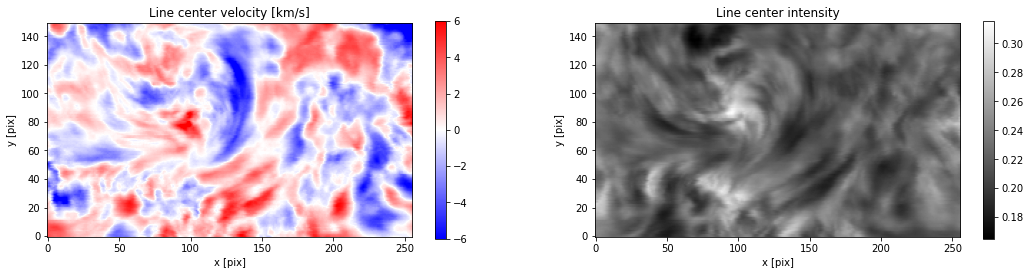

In [25]:
# And let's plot the velocity map! Exciting!
plt.figure(figsize=[18,8])
plt.subplot(121)
plt.imshow(v_line_center,vmin=-6,vmax=6,cmap='bwr',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Line center velocity [km/s]")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")
plt.subplot(122)
plt.imshow(cube_halpha[:,:,indices[3]],cmap='gray',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Line center intensity")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")

### Let's spend some time discussing this. What do these velocities mean? What do they tell us? What are the advantages and disadvantages of this approach?

After we are done with these, we can play and visualize a little bit this, but we can also move toward a more sophisticated method:

## Finding velocity via bisectors!!!!

In [26]:
# Let's go toward the hardest mode first! Bisectors!
levels = np.asarray([0.85,0.7,0.6,0.5,0.4])

In [27]:
def calc_bisectors(spectrum,wavelength,levels):
    # this is the function that takes in the spectrum, wavelength and desired bisector levels
    # and returns the position of the center of the horizontal line that connects the points 
    # of the desired from both sides of the >>local<< line center (meanining the point with min intensity)
    from scipy.interpolate import interp1d
    
    local_min = np.argmin(spectrum)
    
    result = np.zeros(len(levels))
    
    for i in range(0,len(levels)):
        f = interp1d(spectrum[:local_min],wavelength[:local_min])
        left_position = f(levels[i])
        f = interp1d(spectrum[local_min:],wavelength[local_min:])
        right_position = f(levels[i])
        result[i] = (right_position + left_position)*0.5
        
    return result

In [28]:

test = calc_bisectors(cube_halpha[6,7]/mean_spectrum[0],ll_halpha,levels) 

In [29]:
print (test)

[6562.87627719 6562.85439704 6562.86422465 6562.86728471 6562.8746145 ]


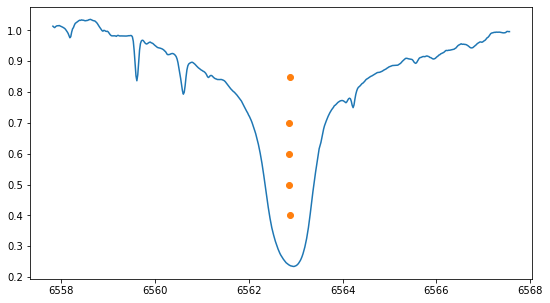

In [30]:
plt.figure(figsize=[9,5])
plt.plot(ll_halpha,cube_halpha[6,7])
plt.plot(test,levels,'o')

In [31]:
# Translate bisectors to velocities:
bisector_velocities = (test-ll0)/ll0 * 2.997E5

In [39]:
print (bisector_velocities)
print (ll0)

[[[ 2.68026868e+00  8.48428108e-01  9.86590169e-01  9.71811062e-01
    1.29005475e+00]
  [-2.27055534e+00  7.14945327e-01  8.93924615e-01  8.54998910e-01
    1.18086646e+00]
  [-1.04463433e+01  5.43920551e-01  8.29214681e-01  8.14374327e-01
    1.18543805e+00]
  ...
  [ 5.08408191e+00  1.29810820e+00  5.76359306e-01 -1.03583214e-01
   -1.24358749e-01]
  [ 4.91021603e+00  1.38906925e+00  6.99084775e-01  8.10673771e-03
   -2.71990654e-02]
  [ 5.55169113e+00  1.48921541e+00  8.20550515e-01  9.54436059e-02
    4.83945448e-02]]

 [[ 6.63328319e+00  8.14800192e-01  9.43660534e-01  9.34359880e-01
    1.28088540e+00]
  [ 6.40309872e+00  6.07299839e-01  8.82541975e-01  8.40969705e-01
    1.18387389e+00]
  [ 6.33418477e+00  4.49831586e-01  7.94327432e-01  7.79227651e-01
    1.12863692e+00]
  ...
  [-1.32967897e+01  1.32208861e+00  6.60346388e-01  2.39230034e-02
    1.19883506e-02]
  [ 4.81921332e+00  1.44900261e+00  8.17145856e-01  1.65468543e-01
    1.17744438e-01]
  [ 5.15547512e+00  1.5715298

In [33]:
bisectors = np.zeros([150,256,5])
for i in range(0,150):
    for j in range(0,256):
        bisectors[i,j,:] = calc_bisectors(cube_halpha[i,j,:],ll_halpha,levels)

In [34]:
bisector_velocities = (bisectors-ll0)/ll0 * 2.997E5

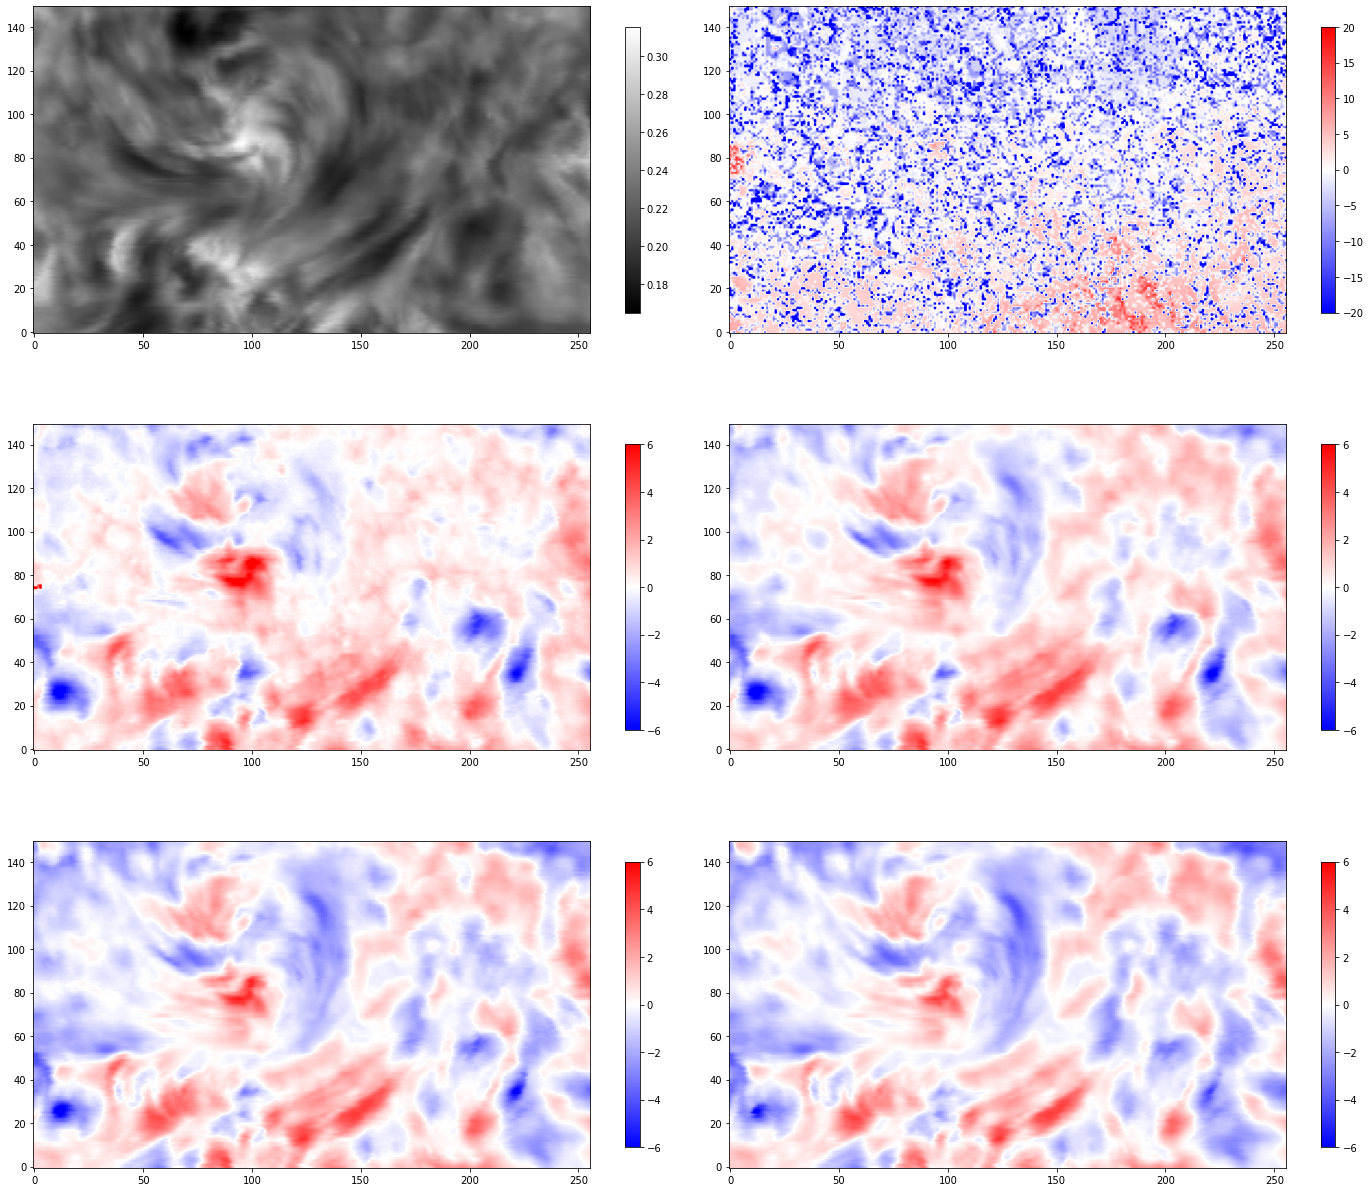

In [42]:
plt.figure(figsize=[20,18])
plt.subplot(321)
plt.imshow(cube_halpha[:,:,263],cmap='gray',origin='lower')
plt.colorbar(shrink=0.65)
plt.subplot(322)
plt.imshow(bisector_velocities[:,:,0],cmap='bwr',vmin=-20,vmax=20,origin='lower')
plt.colorbar(shrink=0.65)
plt.subplot(323)
plt.imshow(bisector_velocities[:,:,1],cmap='bwr',vmin=-6,vmax=6,origin='lower')
plt.colorbar(shrink=0.65)
plt.subplot(324)
plt.imshow(bisector_velocities[:,:,2],cmap='bwr',vmin=-6,vmax=6,origin='lower')
plt.colorbar(shrink=0.65)
plt.subplot(325)
plt.imshow(bisector_velocities[:,:,3],cmap='bwr',vmin=-6,vmax=6,origin='lower')
plt.colorbar(shrink=0.65)
plt.subplot(326)
plt.imshow(bisector_velocities[:,:,4],cmap='bwr',vmin=-6,vmax=6,origin='lower')
plt.colorbar(shrink=0.65)
plt.tight_layout()

### Let's try to investigate the behaviour of specific pixels. Namely, we want to investigate the dark features seen in the line wing (say. 0.8 Angstroms from the line core). That corresponds to our wavelength index 220

In [43]:
%matplotlib notebook
import matplotlib.pyplot as plt 


<IPython.core.display.Javascript object>


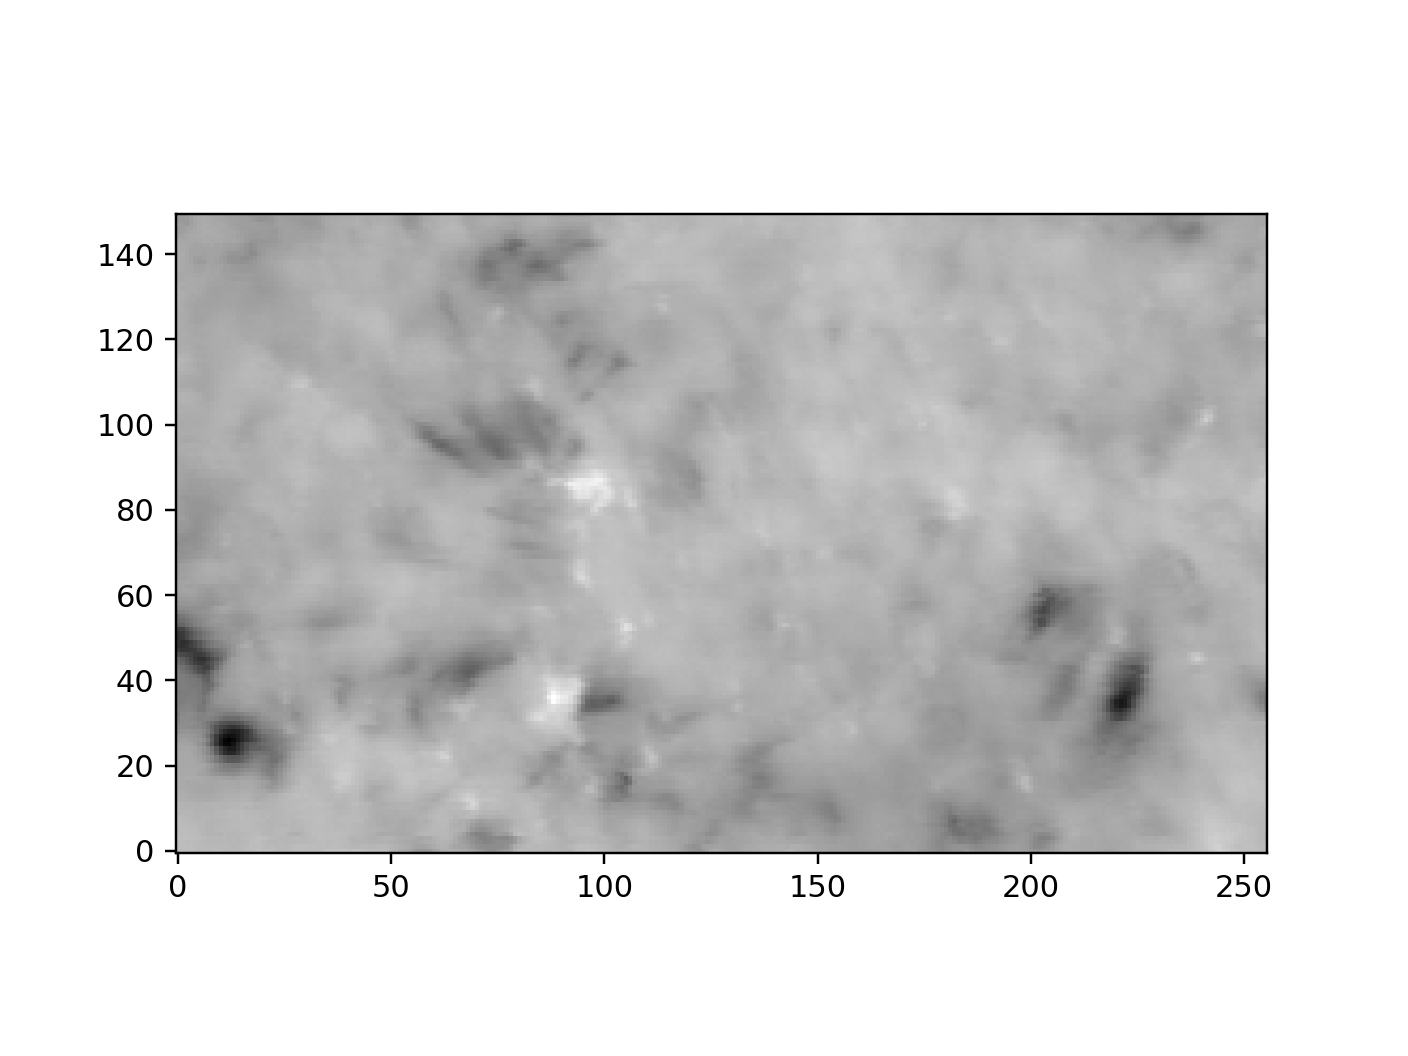

9

In [44]:
# Let's plot the image, wavelength by wavelength. Choose interesting indices from the plot above:
f,a = plt.subplots()
pos = []
def onclick(event):
    pos.append([event.xdata,event.ydata])
a.imshow(cube_halpha[:,:,220],cmap='gray',origin='lower')
f.canvas.mpl_connect('button_press_event', onclick)

In [45]:
print(pos)

[[58.304986769153224, 97.64632858321124], [59.85337386592743, 96.61407051869512], [60.88563193044356, 95.58181245417899], [63.46627709173388, 94.03342535740481], [65.53079322076613, 90.93665116385642]]


In [46]:
%matplotlib inline
import matplotlib.pyplot as plt 
# This is reverting back to the default plotting style

### To finish this, let's calculate the width of the line! 

#### Do you have an idea why the width of the line might be important?

In [51]:
# We are going to it like this: 
def width(spectrum,wavelength):
    # The idea is to take the local line center, then two points 1A to each side. 
    # Calculate the mean of these two, half that and calculate the width at that level
    # (as if you were calculating the bisector). Let's go
    from scipy.interpolate import interp1d
    
    line_core = calc_line_center(spectrum,wavelength)
    l_left = line_core - 1.0
    l_right = line_core + 1.0
    
    f = interp1d(wavelength,spectrum)
    I_left = f(l_left)
    I_right = f(l_right)
    I_mean = 0.5*(I_left+I_right)
    I_min = f(line_core)
    I_crit = I_min + (I_mean - I_min)*0.5
    
    # Now we need to find points at this level at each side of the core: 
    # Point closest to the line center:
    local_min = np.argmin(np.abs(wavelength-line_core))
    
    f = interp1d(spectrum[:local_min],wavelength[:local_min])
    left_position = f(I_crit)
    f = interp1d(spectrum[local_min:],wavelength[local_min:])
    right_position = f(I_crit)
    result = (right_position - left_position)
        
    return result

In [48]:
print (width(cube_halpha[6,7],ll_halpha))

1.0328010988123424


In [49]:
# Let calculate for the whole map:
widths = np.zeros([150,256])
for i in range(0,150):
    for j in range(0,256):
        widths[i,j] = width(cube_halpha[i,j,:],ll_halpha)

Text(0, 0.5, 'y [pix]')

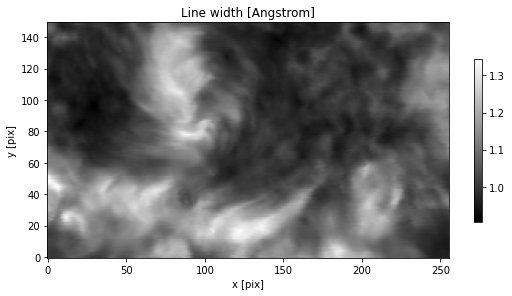

In [52]:
# And let's plot the velocity map! Exciting!
plt.figure(figsize=[9,6])
plt.imshow(widths,cmap='gray',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Line width [Angstrom]")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")

Text(0, 0.5, 'y [pix]')

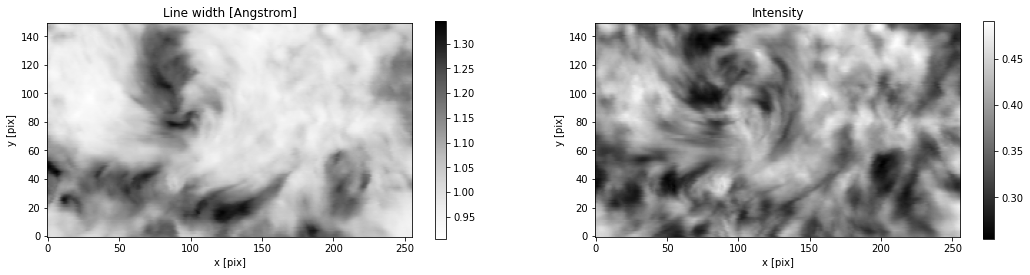

In [53]:
plt.figure(figsize=[18,8])
plt.subplot(121)
plt.imshow(widths,cmap='Greys',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Line width [Angstrom]")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")
plt.subplot(122)
plt.imshow(cube_halpha[:,:,240],cmap='gray',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Intensity")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")

## Now let's repeat some of the steps above for Ca II 8542 and compare the inferred velocities! 

In [54]:
# First we will open the most dramatic spectral line, H alpha
cube_ca = fits.open("/home/milic/Dropbox/FISS_velocities/CaII.FISS.20170614_170511.quiet.fits")[0].data
cube_ca.shape

(150, 250, 502)

Very similar shape of the image, and similar number of wavelengths too! 

Text(0.5, 1.0, 'Continuum')

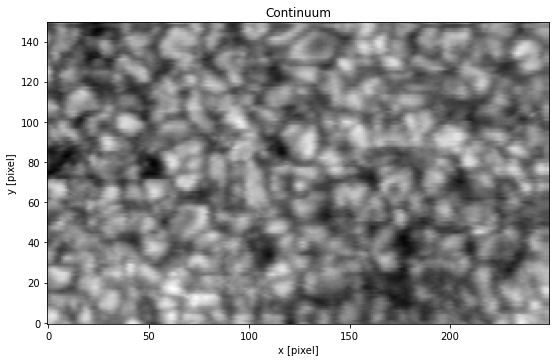

In [56]:
plt.figure(figsize=[9,9])
plt.imshow(cube_ca[:,:,5],cmap='gray',origin='lower')
plt.xlabel("x [pixel]")
plt.ylabel("y [pixel]")
plt.title("Continuum")

In [57]:
ll_ca = fits.open("/home/milic/Dropbox/FISS_velocities/wavca.fiss.20170614.fits")[0].data
ll_ca.shape

(502,)

Text(0.5, 1.0, 'Spatially averaged spectrum')

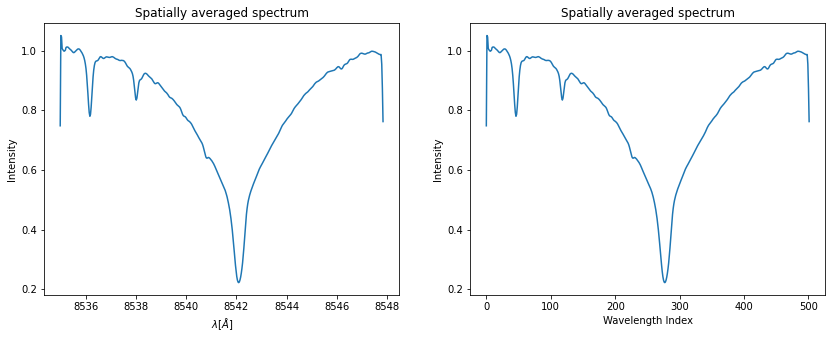

In [63]:
cube_ca /= np.mean(cube_ca[:,:,5]) # why did we choose point 5 here? It will become clear soon
mean_ca = np.mean(cube_ca,axis=(0,1))
plt.figure(figsize=[14,5])
plt.subplot(121)
plt.plot(ll_ca,mean_ca)
plt.xlabel("$\\lambda [\\AA]$")
plt.ylabel("Intensity")
plt.title("Spatially averaged spectrum")
plt.subplot(122)
plt.plot(mean_ca)
plt.xlabel("Wavelength Index")
plt.ylabel("Intensity")
plt.title("Spatially averaged spectrum")

Text(0.5, 1.0, 'Wavelength = 0.32147051397987525')

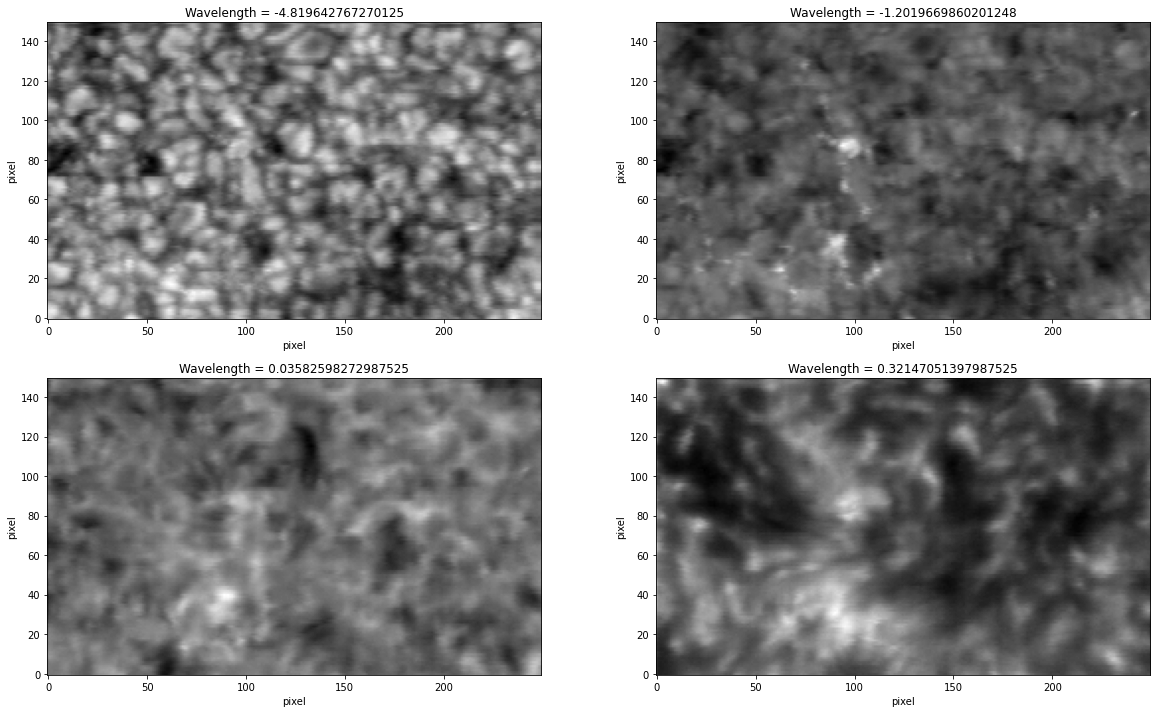

In [65]:
# Let's plot multiple wavelengths now:
indices = [10,200,265,280]

plt.figure(figsize=[20,12])
plt.subplot(221)
plt.imshow(cube_ca[:,:,indices[0]],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_halpha[indices[0]]-ll0))
plt.subplot(222)
plt.imshow(cube_ca[:,:,indices[1]],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_halpha[indices[1]]-ll0))
plt.subplot(223)
plt.imshow(cube_ca[:,:,indices[2]],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_halpha[indices[2]]-ll0))
plt.subplot(224)
plt.imshow(cube_ca[:,:,indices[3]],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_halpha[indices[3]]-ll0))

#### Wow! Looks a little bit similar to Ha alpha, but there are differences. Can you scroll up now and comment briefly on the differences between the two? 
.
.
.
.

#### Ok, now time to find the line center position and measure some velocities afterwards! 

In [66]:
# Let's try on a random spectrum and see if it makes sense: 
l_center_ca = calc_line_center(mean_ca,ll_ca)
print (l_center_ca)

8542.09568157267


In [70]:
plot.subplot(121)
plt.imshow(v_ca,vmin=-6,vmax=6,cmap='bwr',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Calciu, 8542 line center velocity [km/s]")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")# Makes sense, now do that for each spectrum! 
v_ca = np.zeros([150,250])

for i in range(0,150):
    for j in range(0,250):
        v_ca[i,j] = calc_line_center(cube_ca[i,j],ll_ca)

In [71]:
v_ca = (v_ca - l_center_ca) / l_center_ca * 2.997E5

Text(0, 0.5, 'y [pix]')

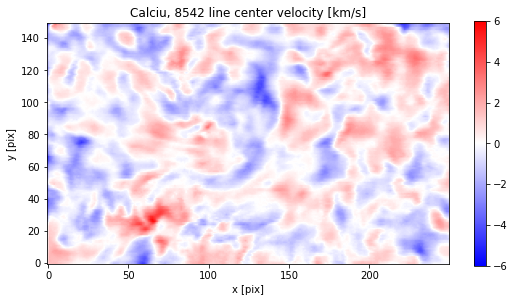

In [72]:
# And the velocity!!!!1
plt.figure(figsize=[9,9])
plt.imshow(v_ca,vmin=-6,vmax=6,cmap='bwr',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Calciu, 8542 line center velocity [km/s]")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")

### Let's plot Halpha velocities and Ca II 8542 velocities side by side: 

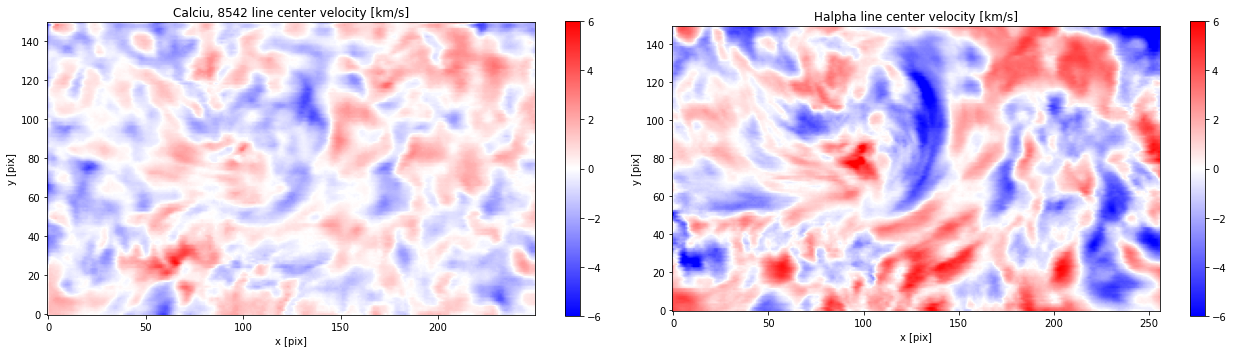

In [77]:
# And the velocity!!!!1
plt.figure(figsize=[18,8.5])
plt.subplot(121)
plt.imshow(v_ca,vmin=-6,vmax=6,cmap='bwr',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Calciu, 8542 line center velocity [km/s]")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")
plt.subplot(122)
plt.imshow(v_line_center,vmin=-6,vmax=6,cmap='bwr',origin='lower')
plt.colorbar(shrink=0.5)
plt.title("Halpha line center velocity [km/s]")
plt.xlabel("x [pix]")
plt.ylabel("y [pix]")
plt.tight_layout()

## Next (final) task: Calculate bisector velocities for Ca II 8542. 

#### Since this line is more sensitive to the upper photosphere than Halpha, we expect to see a bit more here.

In [83]:
# Let's test:
levels = np.asarray([0.9,0.8,0.7,0.6,0.5,0.4])
test = calc_bisectors(cube_ca[6,7]/mean_spectrum[0],ll_ca,levels) 
print(test)

[8542.00235973 8542.04160932 8540.97028191 8542.06841058 8542.10225402
 8542.14470038]


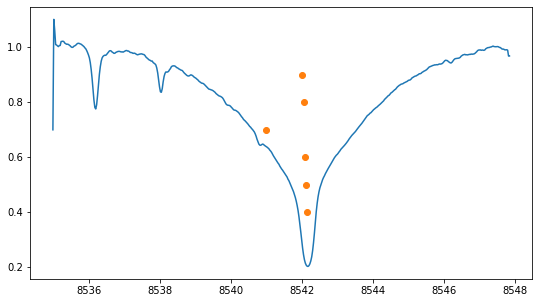

In [84]:

plt.figure(figsize=[9,5])
plt.plot(ll_ca,cube_ca[6,7])
plt.plot(test,levels,'o')

### Interesting! What will this weird blip cause? 

In [86]:
bisectors_ca = np.zeros([150,256,6])
for i in range(0,150):
    for j in range(0,250):
        bisectors_ca[i,j,:] = calc_bisectors(cube_ca[i,j,:],ll_ca,levels)

In [89]:
bisector_velocities_ca = (bisectors_ca-l_center_ca)/l_center_ca * 2.997E5

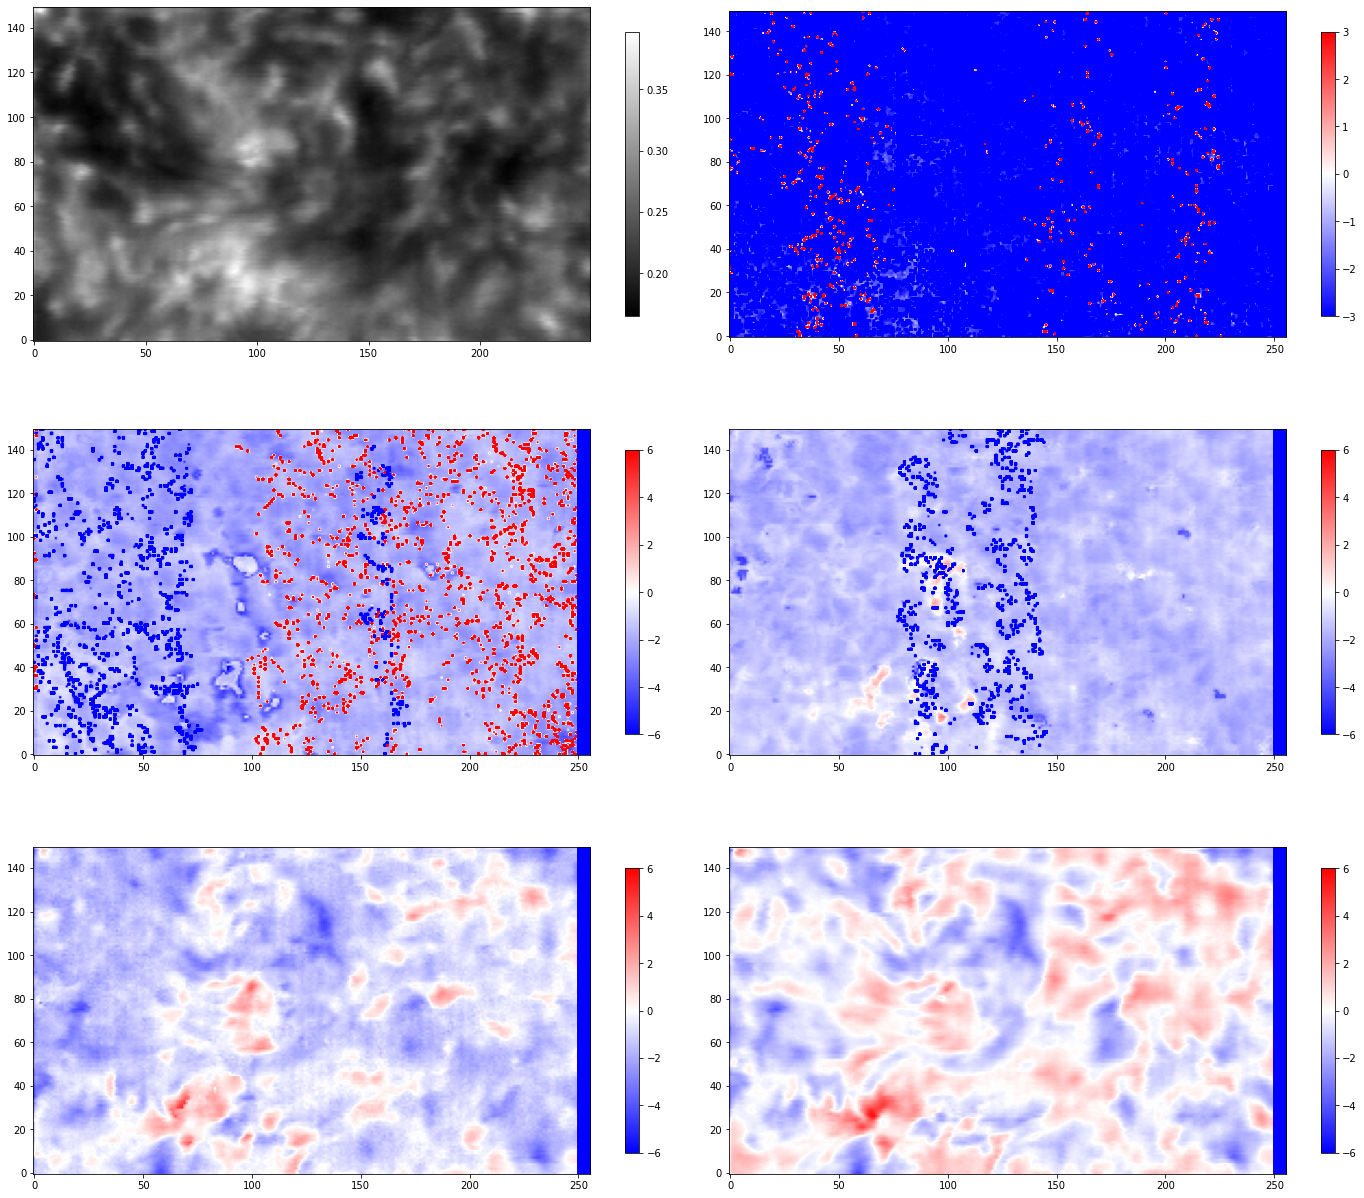

In [90]:
# Let's have a look at Ca 8542 velocities:
plt.figure(figsize=[20,18])
plt.subplot(321)
plt.imshow(cube_ca[:,:,280],cmap='gray',origin='lower')
plt.colorbar(shrink=0.65)
plt.subplot(322)
plt.imshow(bisector_velocities_ca[:,:,0],cmap='bwr',vmin=-3,vmax=3,origin='lower')
plt.colorbar(shrink=0.65)
plt.subplot(323)
plt.imshow(bisector_velocities_ca[:,:,2],cmap='bwr',vmin=-6,vmax=6,origin='lower')
plt.colorbar(shrink=0.65)
plt.subplot(324)
plt.imshow(bisector_velocities_ca[:,:,3],cmap='bwr',vmin=-6,vmax=6,origin='lower')
plt.colorbar(shrink=0.65)
plt.subplot(325)
plt.imshow(bisector_velocities_ca[:,:,4],cmap='bwr',vmin=-6,vmax=6,origin='lower')
plt.colorbar(shrink=0.65)
plt.subplot(326)
plt.imshow(bisector_velocities_ca[:,:,5],cmap='bwr',vmin=-6,vmax=6,origin='lower')
plt.colorbar(shrink=0.65)
plt.tight_layout()